   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.5 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.1 MB 1.4 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.5 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.4 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.5 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.5 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 1.4 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.4 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.4 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.1 MB 1.3 MB/s eta 0:00:04
   --------------- -------

C:\Users\hoang\AppData\Local\Temp\ipykernel_6976\1344960099.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


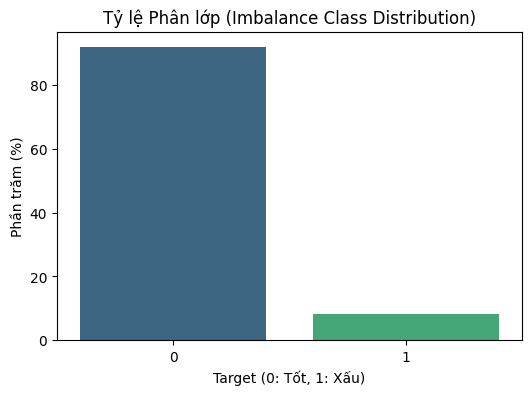


Top 10 cột thiếu dữ liệu nhiều nhất (%):
COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_AVG              69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
dtype: float64


In [2]:
%pip install matplotlib seaborn pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dữ liệu
print("Đang đọc dữ liệu...")
df = pd.read_csv('../data/application_train.csv')
print(f"Shape dữ liệu: {df.shape}")

# 2. Kiểm tra Target 
# Target = 1: Khách hàng có vấn đề trả nợ
# Target = 0: Khách hàng trả nợ tốt
target_counts = df['TARGET'].value_counts(normalize=True) * 100
print("\nTỷ lệ phân lớp (%):")
print(target_counts)

# Vẽ biểu đồ mất cân bằng
plt.figure(figsize=(6,4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title('Tỷ lệ Phân lớp (Imbalance Class Distribution)')
plt.xlabel('Target (0: Tốt, 1: Xấu)')
plt.ylabel('Phần trăm (%)')
plt.show()

# 3. Kiểm tra dữ liệu bị thiếu
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

print("\nTop 10 cột thiếu dữ liệu nhiều nhất (%):")
print(missing_percent.head(10))